<a href="https://colab.research.google.com/github/m-hironori/learing-keras/blob/master/2_2%E5%80%A4%E5%88%86%E9%A1%9E(IMDb%E3%83%AC%E3%83%93%E3%83%A5%E3%83%BC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# 2値分類(IMDbレビュー)

kerasによるモデル作成の基本として、2値分類の例をやってみましょう。
今回は、[IMDb](https://www.imdb.com/)という映画レビューサイトのポジネガ分類をやってみましょう。



 

## 問題設定

まずは、問題設定を確認してみましょう。

### 問題設定の確認


問題属性 | 問題内容
--- | ---
入力データ形式 | レビューテキスト（英語）
予測すること | レビュー内容が、ポジティブ or ネガティブ
評価指標 | accuracy
評価方法 | ホールドアウト

レビューテキストを入力に、ポジティブかネガティブかを当てることが問題設定です。

keras には、あらかじめこのデータセットが用意されていて、扱いやすいため、
keras のテキストを使った例としてはよく使われます。


## データ準備

データを準備してみましょう

### データ取得する

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

データロードの関数が用意されているので、これを呼ぶだけで、データ取得が終わります。

ダウンロード後、num_words=10000で、出現頻度順上位10,000の単語のみをロードしています。

### 内容を確認する

* テンソルで準備：データはテンソル ( Numpy でーたが扱いやすい ) として準備
* 値を正規化：値は [ -1 , -1 ] や [ 0 , 1 ] ぐらいの値にスケーリングしておく
* スケール合わせ：特徴量の値の範囲がことなったり、異なる種類のデータを使う場合は、スケールを合わせるためにデータを正規化する 

基本的に、上記3点がデータ準備で必要なことです。テンソル準備、値を正規化、そしてスケールを合わせる。

今回はテキストデータのみなので、スケール合わせは必要なさそうです。

### データ型を確認する

In [3]:
print("\tデータ型")
print(f"訓練データ\t{type(train_data)}")
print(f"訓練ラベル\t{type(train_labels)}")
print(f"テストデータ\t{type(test_data)}")
print(f"テストラベル\t{type(test_labels)}")

	データ型
訓練データ	<class 'numpy.ndarray'>
訓練ラベル	<class 'numpy.ndarray'>
テストデータ	<class 'numpy.ndarray'>
テストラベル	<class 'numpy.ndarray'>


Numpy形式で用意されているので、今回もデータ型はこのままでよさそうです。

In [4]:
import numpy as np

print("\tデータサイズ\t型\t最大値\t最小値")
print(f"訓練データ\t{train_data.shape}\t{train_data.dtype}\t{train_data.max()}\t{train_data.min()}")
print(f"訓練ラベル\t{train_labels.shape}\t{train_labels.dtype}\t{train_labels.max()}\t{train_labels.min()}")
print(f"テストデータ\t{test_data.shape}\t{test_data.dtype}\t{test_data.max()}\t{test_data.min()}")
print(f"テストラベル\t{test_labels.shape}\t{test_labels.dtype}\t{test_labels.max()}\t{test_labels.min()}")

	データサイズ	型	最大値	最小値
訓練データ	(25000,)	object	[1, 9995, 2, 7, 2208, 7335, 3135, 4173, 3783, 509, 1683, 4702, 2, 2, 6, 201, 7, 6415, 687, 2, 2, 7, 6387, 548, 139, 7583, 295, 34, 4485, 5302, 2, 2, 2, 7, 2, 2, 146, 24, 1017, 2282, 133, 21, 4, 1591, 3113, 786, 2, 16, 125, 4, 2, 9790, 2039, 137, 267, 2, 5, 2, 120, 2024, 980, 2, 1248, 5666, 727, 1405, 6879, 1060, 6442, 18, 2, 1461, 2, 1883, 445, 109, 5369, 3696, 33, 236, 786, 5580, 7994, 8, 2, 2, 103, 2, 98, 11, 2, 1461, 24, 66, 351, 1461, 165, 116, 17, 2545, 18, 6717, 8694, 5514, 980, 2545, 165, 734, 18, 2311, 52, 84, 157, 18, 7232, 11, 661, 8, 607, 3531, 223, 1066, 445, 9236, 996, 8, 2898, 4931, 8, 5526, 8316, 7880, 154, 378, 459, 18, 6942, 632, 5, 79, 2024, 18, 68, 4918, 813, 2456, 2, 17, 840, 4807, 3854, 23, 136, 159, 5770, 852, 1698, 632, 7708, 7993, 1003, 1372, 5747, 2, 7, 5840, 5408, 11, 7200, 120, 4682, 7, 2, 3368, 2103, 8, 1140, 2, 880, 1692, 7, 68, 205, 3565, 5903, 21, 3204, 1372, 2, 2, 1098, 125, 128, 2429, 21, 9000, 2, 632, 2, 245, 39,

よさそうに思いきや、データの内容が、object型でした。このままではだめそうですね。

訓練ラベルは、整数型で1と0の値しかないため、このままでよさそうです。

### データ内容を確認する

In [5]:
# 訓練データ内容を表示する
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

入力はテキストデータのはずなのに、数字の列になっています。




### テキストデータの前処理



No | 処理     | 内容 | 例(This movie was just brilliant casting)
---|----------|------|---
1  | Tokenize | テキストを単語に区切る | `["This", "movie", "was", "just", "brilliant", "casting"]`
2  | Normalize| 大文字を小文字に変換、活用形を原型に変えるなど | `["this", "movie", "was", "just", "brilliant", "casting"]`
3  | Indexing | 単語の辞書を作成しながらインデックスに変換 | `[14, 22, 16, 43, 530, 13, 19]`


テキストデータを扱うときは、各単語を単語のインデックスデータに変換して扱います。

まず、テキストを、単語に区切ります。これが、データの最小単位になります。
次に、正規化を行います。大文字を小文字に変換したり、活用形を原型に戻したり(played -> play)します。この処理は、実施するデータによって何を行うかまちまちです。
次に、単語の辞書を作成しながらインデックスに変換していきます。"this"はインデックス14に変換するといった辞書を作成していき、同じ単語は同じインデックス番号となるようにします。

このような処理によって単語インデックスのシーケンスができます。

Keras の IMDb データセットでは、あらかじめ、このような処理が行われていて、テキストデータをインデックスデータに変換してくれています。

### 単語インデックスデータをテキストに戻してみる

In [6]:
# 単語インデックス(単語->インデックス))を　逆転させる(インデックス -> 単語 )
reverse_word_index = dict([(value, key) for (key, value) in imdb.get_word_index().items()])
# imdbデータセットではインデックスオフセットは 3
# 0: パディング用に予約, 1: シーケンス開始を示すために予約, 2: 足きりなどにより未登録の単語用に予約.
# 詳細は https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification の start_char=1, oov_char=2, index_from=3 あたりを参照
decoded = []
for i in train_data[0]:
    if i == 0:
        decoded.append("[PAD]")
    elif i == 1:
        decoded.append("[START]")
    elif i == 2:
        decoded.append("[UNK]")
    else:
        decoded.append(reverse_word_index[i - 3])
print(' '.join(decoded))


[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [UNK] is an amazing actor and now the same being director [UNK] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [UNK] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [UNK] to the two little boy's that played the [UNK] of norman and paul they were just brilliant children are often left out of the [UNK] list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wha

単語インデックスからテキストデータに戻してみましょう。

このように、元のテキストがわかります。どうやら、正規化では、大文字小文字変換程度しかやっていないようです。活用形をもとに戻したりはしていないのがわかります。

これで、データの中身がわかりました。

## ベースライン精度(統計的検出力)

データの統計的な情報から、ランダムに選択した場合の精度を求めてみます。 これから作成するモデルで、これを上回らないと、ランダムに選択したときに負けてしまい、意味がなくなります。

Text(0.5, 1.0, 'test_labels histgram')

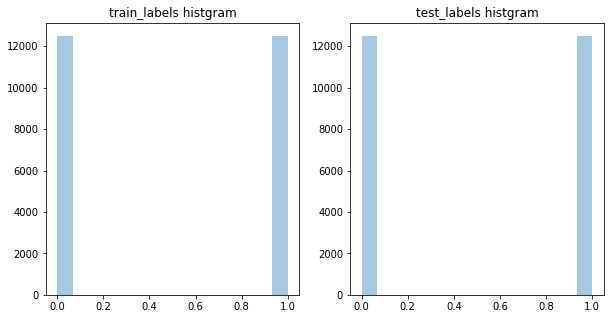

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(train_labels, kde=False, rug=False, ax=ax1)
ax1.set_title("train_labels histgram")
sns.distplot(test_labels, kde=False, rug=False, ax=ax2) 
ax2.set_title("test_labels histgram")

訓練データもテストデータもラベルの分布は同じで、"0"も"1"も同数程度あります。
なので、accuracyを評価指標として大丈夫そうです。

同数あるので、accuracy=0.5 がベースラインになりますね。


## モデル開発

では、すごく簡単なモデルを作成してみましょう。

### テキストデータとラベルをテンソルに変換

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    # 全部ゼロのマトリックス (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # 単語インデックスに 1 
    return results

# テキストデータをテンソルに変換
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# ラベルをテンソルに変換
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("\tデータサイズ\t型\t最大値\t最小値")
print(f"訓練データ\t{x_train.shape}\t{x_train.dtype}\t{x_train.max()}\t{x_train.min()}")
print(f"訓練ラベル\t{y_train.shape}\t{y_train.dtype}\t{y_train.max()}\t{y_train.min()}")
print(f"テストデータ\t{x_test.shape}\t{x_test.dtype}\t{x_test.max()}\t{x_test.min()}")
print(f"テストラベル\t{y_test.shape}\t{y_test.dtype}\t{y_test.max()}\t{y_test.min()}")

	データサイズ	型	最大値	最小値
訓練データ	(25000, 10000)	float64	1.0	0.0
訓練ラベル	(25000,)	float32	1.0	0.0
テストデータ	(25000, 10000)	float64	1.0	0.0
テストラベル	(25000,)	float32	1.0	0.0


テキストデータは、今回は単語インデックスデータまで作成されているので、この単語インデックス番目が出現したら 1 となるようなベクトルデータを作成します。

ラベルデータは、0と1をテンソルに変換しておきます。

これにより、データをテンソルに変換します。

### モデルを定義する

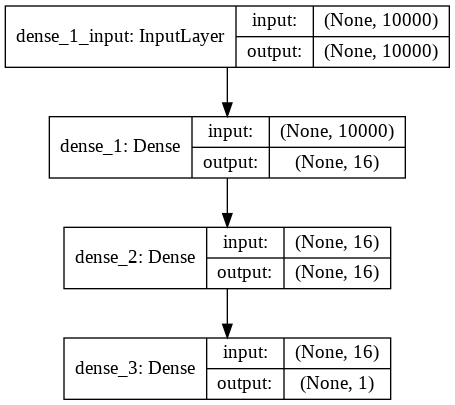

In [9]:
from keras import models
from keras import layers
from keras.utils import plot_model

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# モデルを表示
plot_model(model, show_shapes=True)

入力データは、10000個の単語インデックスデータで、単語が出現していれば1となるデータす。
これを 16個の隠れ変数を持つDense層とします。

さらにもう一度同じDense層を重ねます。

これを、1となる確率だけを求める 1個の隠れ変数をとるDense層を重ねます。

２値分類では、0か1かを当てるため、1となる確率だけを求めれば、0となる確率も求めることができます。 1 から 1となる確率を引けばよいのです。
なので、最終層では1となる確率だけを求めればよいのです。

最後の、Dense層は、出力となる 0 と 1のどちらかの分類問題と解くため、1個の要素に変換し、活性化関数は sigmoid としています。

### コンパイルする

In [10]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


２つ分類タスクでは、0か1かどちらかを求めるため、lossにbinary_crossentropyを用います。

kerasでは、最適化、損失関数、メトリクスにこのように関数を指定することができます。より詳細なパラメータをいじりたい時には有効なので、こちらで指定してみましょう。

### 訓練する

In [11]:
# validationにも使うため、訓練データをランダムに並べ替える
np.random.seed(seed=0)
indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]

# fitメソッドを呼んで訓練
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_split=0.1)




Train on 22500 samples, validate on 2500 samples
Epoch 1/20





22500/22500 [==============================] - 3s 122us/step - loss: 0.4612 - binary_accuracy: 0.8173 - val_loss: 0.3333 - val_binary_accuracy: 0.8828
Epoch 2/20
22500/22500 [==============================] - 3s 115us/step - loss: 0.2663 - binary_accuracy: 0.9100 - val_loss: 0.2829 - val_binary_accuracy: 0.8888
Epoch 3/20
22500/22500 [==============================] - 3s 113us/step - loss: 0.2023 - binary_accuracy: 0.9302 - val_loss: 0.2654 - val_binary_accuracy: 0.8964
Epoch 4/20
22500/22500 [==============================] - 3s 116us/step - loss: 0.1692 - binary_accuracy: 0.9416 - val_loss: 0.2856 - val_binary_accuracy: 0.8836
Epoch 5/20
22500/22500 [==============================] - 3s 118us/step - loss: 0.1444 - binary_accuracy: 0.9514 - val_loss: 0.2848 - val_binary_accuracy: 0.8896
Epoch 6/20
22500/22500 [==============================] - 3s 115us/step - loss: 0.1268 - binary_accuracy: 0.9578 - val_loss: 0.3050 -

### 学習過程をみてみる

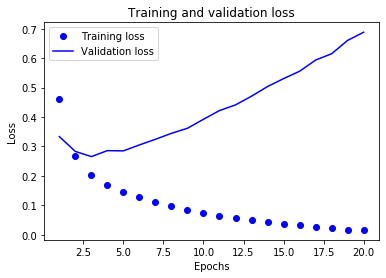

In [12]:
plt.clf()   # clear figure

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

訓練データのlossは順次減っているので、モデルとしては悪くなさそうです。

バリデーションデータのlossは、4エポック目以降どんどん上がっているため、過学習を起こしています。

このモデルだと、3エポック目程度でとどめておくのがよさそうです。

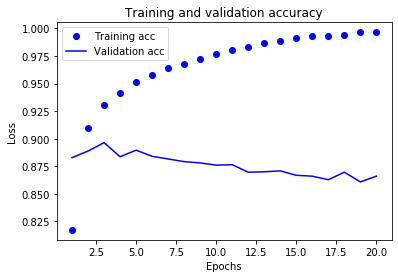

In [13]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

accuracyでも、lossと同じ傾向が出ています。

3エポックくらいでとどめておくのがもっとも精度がよさそうです。

### 精度を測る


In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
25000/25000 [==============================] - 3s 112us/step - loss: 0.4425 - binary_accuracy: 0.8155
Epoch 2/3
25000/25000 [==============================] - 2s 99us/step - loss: 0.2538 - binary_accuracy: 0.9086
Epoch 3/3
25000/25000 [==============================] - 2s 66us/step


[0.2850270633220673, 0.88648]

88%の精度がでました。ベースラインは大幅に上回りました。

学習過程でも見たとおり、過学習に陥っているため、モデルを見直しておく必要はありそうです。